/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.



 Optimal Lambda:  0.3890


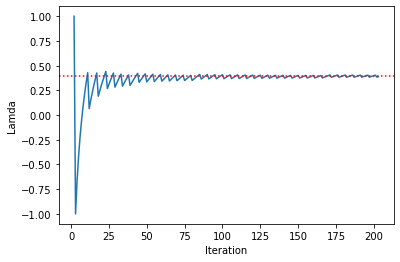


 Optimal Cost:  5.3840


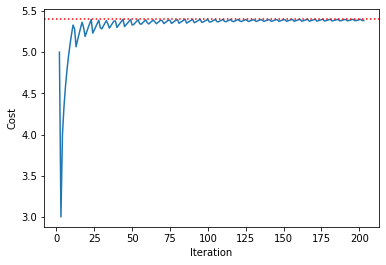

In [5]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To

    arc_idxs = [(arc[0], arc[1]) for arc in idxs]

    return NA, arc_idxs


#importing the data - NN matrix

NN = np.array([[0, 1, 1, 0, 0, 0],   
               [0, 0, 0, 1, 0, 1],   
               [0, 0, 0, 0, 1, 0],   
               [0, 0, 0, 0, 0, 1],   
               [0, 0, 0, 0, 0, 1],   
               [0, 0, 0, 0, 0, 0]])  
                     

#formulation of LP
Aeq, arcs = nn2na(NN) 
T_a = np.array([[3, 1, 3, 1, 3, 3, 5]])
beq = [1, 0, 0, 0, 0, -1]
T_b = 8
C = np.array([2, 1, 2, 5, 2, 1, 2])


bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])
    

def new_c(lam):
    return C + lam * T_a[0]

#gradient search of Lamda
L = 0
lam = 0
tol = 0.005
i = 1
delta = 1
x = []
y1 = []
y2 = []


while delta > tol:
    Cm = new_c(lam)
    res = linprog(Cm, A_eq=Aeq, b_eq=beq, bounds=bounds, method='revised simplex')
    L = res.fun - lam * T_b
    grad = np.dot(T_a[0],res.x) - T_b
    step = 1/i
    lam_grad = lam + step * grad
    delta = np.abs(lam_grad - lam)
    lam = lam_grad
    i+=1
    x.append(i)
    y1.append(lam)
    y2.append(L)

print("\n Optimal Lambda: ", format(lam,'.4f'))
plt.plot(x, y1)
plt.xlabel("Iteration")
plt.ylabel("Lamda")
plt.axhline(y=0.4, color='r', linestyle='dotted')
plt.show()

print("\n Optimal Cost: ",  format(L,'.4f'))
plt.plot(x, y2)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.axhline(y=5.4, color='r', linestyle='dotted')
plt.show()